In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [8]:
def prepare_data_classification(df, rotations_from: int = 0, rotations_till: int = np.inf):
    df.dropna(inplace=True)
    df = df[df['No_of_Rotation_(excluding_bonus)'] >= rotations_from]
    df = df[df['No_of_Rotation_(excluding_bonus)'] <= rotations_till]

    df = df.sample(frac=1, random_state=42)
    df = df.reset_index(drop=True)

    df = pd.concat([df, pd.get_dummies(df['setting'].astype(str), prefix='setting')], axis=1)
    df = df.drop('setting', axis=1)

    expected_columns = ['setting_1', 'setting_2', 'setting_3', 'setting_4', 'setting_5', 'setting_6']
    for col in expected_columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' is missing after one-hot encoding.")

    # X = df[['No_of_Rotation_(excluding_bonus)', 'Coins_Inserted_Cumulative',
    #    'Coins_Acquired_Cumulative', 'No_of_Regular_Bonus', 'No_of_Big_Bonus',
    #    'Profit_Loss', 'No_of_grape_till_now', 'No_of_rhino_till_now',
    #    'No_of_cherry_corner_till_now', 'No_of_clown_till_now',
    #    'No_of_cherry_middle_till_now', 'RB_probaility', 'BB_probaility',
    #    'grape_probaility', 'rhino_probaility', 'clown_probaility',
    #    'cherry_probaility']]


    X = df[['No_of_Rotation_(excluding_bonus)', 'Coins_Inserted_Cumulative',
       'Coins_Acquired_Cumulative', 'No_of_Regular_Bonus', 'No_of_Big_Bonus',
       'Profit_Loss', 'No_of_grape_till_now', 'RB_probaility', 'BB_probaility',
       'grape_probaility']]

    y = df[expected_columns]

    return X, y



def prepare_data_regression(df, rotations_from: int = 0, rotations_till: int = np.inf):
    df.dropna(inplace=True)

    df = df[df['No_of_Rotation_(excluding_bonus)'] >= rotations_from]
    df = df[df['No_of_Rotation_(excluding_bonus)'] <= rotations_till]

    df = df.sample(frac=1, random_state=42)
    df = df.reset_index(drop=True)

    X = df.drop(columns=["setting"])
    X = df[['No_of_Rotation_(excluding_bonus)', 'Coins_Inserted_Cumulative',
       'Coins_Acquired_Cumulative', 'No_of_Regular_Bonus', 'No_of_Big_Bonus',
       'Profit_Loss', 'No_of_grape_till_now', 'RB_probaility', 'BB_probaility',
       'grape_probaility']]

    # X = df.drop(columns=["setting", "No_of_clown_till_now", "No_of_cherry_middle_till_now", "No_of_cherry_corner_till_now"])
    y = df["setting"]

    return X, y


data = {
    "classification": {
        "train": [],
        "test": [],
    },
    "regression": {
        "train": [],
        "test": [],
    }
}

train_df = pd.read_csv("/content/set2.csv")
test_df = pd.read_csv("/content/set1.csv")

data["classification"]["train"] = prepare_data_classification(train_df, rotations_from=1500)
data["classification"]["test"] = prepare_data_classification(test_df, rotations_from=1500)

data["regression"]["train"] = prepare_data_regression(train_df, rotations_from=1500)
data["regression"]["test"] = prepare_data_regression(test_df, rotations_from=1500)

In [9]:
reg_model = XGBRegressor()
reg_model.fit(data["regression"]["train"][0], data["regression"]["train"][1])
reg_model.score(data["regression"]["test"][0], data["regression"]["test"][1])

0.07564272485336887

In [10]:
clf_model = XGBClassifier()
clf_model.fit(data["classification"]["train"][0], data["classification"]["train"][1])
clf_model.score(data["classification"]["test"][0], data["classification"]["test"][1])

0.298659217877095

In [11]:
rf_model = RandomForestRegressor()
rf_model.fit(data["regression"]["train"][0], data["regression"]["train"][1])

rf_score = rf_model.score(data["regression"]["test"][0], data["regression"]["test"][1])

y_pred = rf_model.predict(data["regression"]["test"][0])


rf_score = rf_model.score(data["regression"]["test"][0], data["regression"]["test"][1])

y_pred = rf_model.predict(data["regression"]["test"][0])

rf_mae = mean_absolute_error(data["regression"]["test"][1], y_pred)

rf_mse = mean_squared_error(data["regression"]["test"][1], y_pred)

rf_rmse = np.sqrt(rf_mse)

print("Random Forest Model Score:", rf_score)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Root Mean Squared Error:", rf_rmse)

Random Forest Model Score: 0.09439433794872953
Random Forest Mean Absolute Error: 1.1886513966480445
Random Forest Mean Squared Error: 2.384492318435754
Random Forest Root Mean Squared Error: 1.5441801444247865


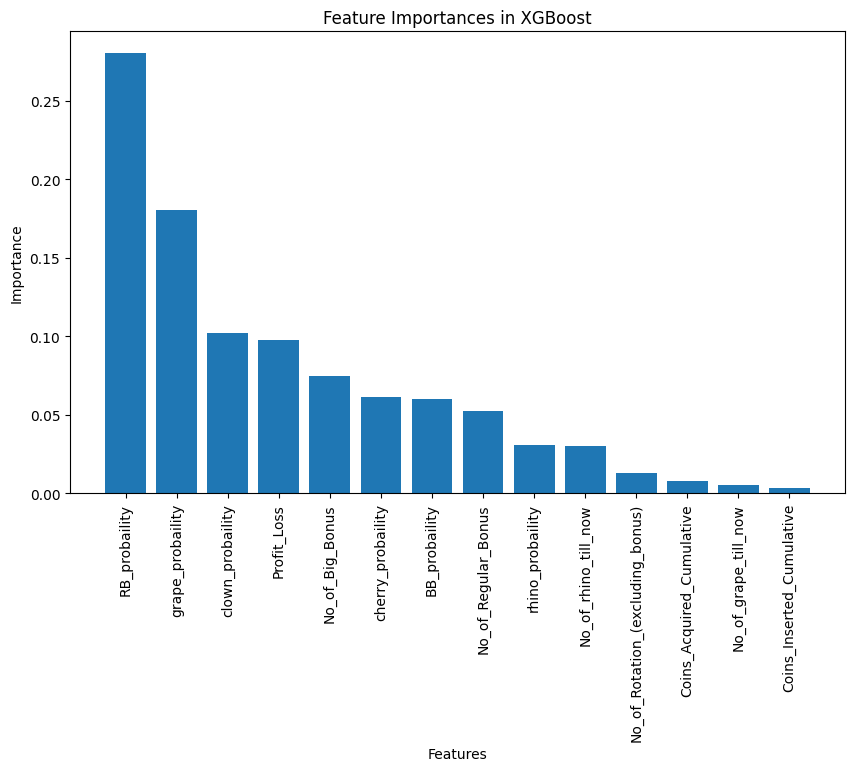

In [ ]:
feature_importances = reg_model.feature_importances_

feature_names = data["regression"]["train"][0].columns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances in XGBoost")
plt.xticks(rotation=90)
plt.show()


In [ ]:
row = 89
X, y = data["classification"]["test"][0].iloc[row].values, data["classification"]["test"][1].iloc[row].values
clf_model.predict([X])

array([[0., 0., 0., 0., 0., 0.]])

In [ ]:
y

array([0, 0, 0, 0, 1, 0], dtype=uint8)

In [13]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 956.3 kB/s eta 0:00:00


In [14]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier


X_train, y_train = data["regression"]["train"][0], data["regression"]["train"][1]
X_test, y_test = data["regression"]["test"][0], data["regression"]["test"][1]

X_train, X_test, y_train, y_test = [i.values for i in [X_train, X_test, y_train, y_test]]

tabnet_model = TabNetClassifier(
    n_d=64,  # Dimension of the embeddings
    n_a=64,  # Dimension of the attention output
    n_steps=5,  # Number of steps in the attention mechanism
    gamma=1.3,  # Scaling factor for the attention updates
    n_independent=2,  # Number of independent Gated Linear Units layers in each step
    n_shared=2,  # Number of shared Gated Linear Units layers in each step
    lambda_sparse=1e-3,  # Sparsity regularization term
    optimizer_fn=torch.optim.Adam,  # Optimizer function
    optimizer_params=dict(lr=2e-2),  # Optimizer parameters
    scheduler_params={"step_size": 10, "gamma": 0.9},  # Scheduler parameters
    scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Scheduler function
    mask_type="entmax",  # Type of sparsity mask to use
    seed=42,  # Random seed for reproducibility
    verbose=1  # Verbosity level
)

# Train the model
tabnet_model.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Validation set
    eval_name=["train", "valid"],
    max_epochs=3,  # Maximum number of training epochs
    patience=20,  # Patience parameter for early stopping
    batch_size=1024,  # Batch size
    virtual_batch_size=128,  # Virtual batch size
    num_workers=0,  # Number of DataLoader workers
    drop_last=False,  # Whether to drop the last incomplete batch
)

# Evaluate the model
# test_preds = tabnet_model.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.40104 | train_accuracy: 0.30991 | valid_accuracy: 0.22112 |  0:00:50s
epoch 1  | loss: 0.08848 | train_accuracy: 0.31255 | valid_accuracy: 0.15039 |  0:01:29s


KeyboardInterrupt: 

In [ ]:
row = 9890

sample = X_test[row]

print([float(i) for i in tabnet_model.predict_proba([sample])[0]])
print(y_test[row])

[1.3173329094229302e-08, 0.0004443130164872855, 0.9827193021774292, 0.005432150326669216, 0.008538179099559784, 0.0028660069219768047]
3


In [ ]:
for i in X_test[row]:
  print(i)

3034.0
9722.0
10236.0
14.0
11.0
514.0
503.0
412.0
59.0
0.0
3.0
0.004614370468029
0.0036255767963085
0.1657877389584706
0.1357943309162821
0.0
0.020435069215557


# **Model Performance History**

**Initial setup, Without the profit loss and probabilites of all features**

XGBoost Regressor: 0.14 <br>
XGBoost Classifier: 0.05 <br>
Pytorch tabnet regressor: 0.15 <br>
Random Forest: -0.25 <br>
<br><br>
**After Adding profit loss columns and the probabilites for each of the icons**

XGBoost Regressor: 0.18 - 0.19 <br>
XGBoost Classifier: 0.210 <br>
Pytorch tabnet regressor: 0.19 <br>
Random Forest: -0.9 <br>
<br><br>

**After removing the cherry rhino and clown**

XGBoost Regressor: 0.075 <br>
XGBoost Classifier: 0.298 <br>
Pytorch tabnet regressor: 0.30 <br>
Random Forest: -0.094 <br>
<br><br>






